<a href="https://colab.research.google.com/github/jgkorman/Statistical-Analysis-In-Python/blob/main/Assignment_3_PDLA_Korman_JamesG_ICPSR_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ICPSR PDLA Assignment 3**
Author: Korman, James, G



## **Reading in the Data & Descriptive Statistics**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import scipy.stats as st
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsap
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_white


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dtafile = '/content/drive/MyDrive/Delaware/ICPSR_2022/Panel Data And Longitudinal Analysis/Assignments/Assignment 2_Topics 3 & 4/Copy of Poe and Tate APSR 1994.dta'

df = pd.read_stata(dtafile)
df['lag_pcgnp'] = df['pcgnp'].shift(1)
df

,ccode,year,vanhdemo,pcgnp,left,ainew,sdnew,milctr2,britinfl,lpop,iwar,cwar,popinc,pcginc,polrtnew,lag_ainew,lag_sdnew,lag_pcgnp
0,2,1980,18.700001,11.347000,0,1,1,0,1,19.243561,0,0,1.008137,7.513738,7,NaN,NaN,NaN
1,2,1981,18.700001,12.253999,0,1,1,0,1,19.254190,0,0,1.008137,7.993301,7,1.0,1.0,11.347000
2,2,1982,18.700001,13.160000,0,1,1,0,1,19.264490,0,0,1.008137,7.393504,7,1.0,1.0,12.253999
3,2,1983,18.700001,14.172000,0,1,1,0,1,19.274239,0,0,1.008137,7.689969,7,1.0,1.0,13.160000
4,2,1984,16.100000,15.541000,0,1,1,0,1,19.283649,0,0,1.008137,9.659893,7,1.0,1.0,14.172000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,990,1983,NaN,0.560000,0,1,1,0,1,11.982929,0,0,1.045530,0.000000,4,1.0,1.0,0.560000
1220,990,1984,NaN,0.680000,0,1,1,0,1,11.989160,0,0,1.045530,21.428570,4,1.0,1.0,0.560000
1221,990,1985,NaN,0.620000,0,1,1,0,1,12.001510,0,0,1.045530,-8.823528,4,1.0,1.0,0.680000
1222,990,1986,NaN,0.560000,0,1,1,0,1,12.013699,0,0,1.045530,-9.677419,4,1.0,1.0,0.620000


# **1. Question 1**
Write out a model to predict either total income (PSID_long_data.dta) or per capita gross national product
(Poe and Tate APSR 1994.dta).

pcgnp*ij* = b0 + b1 X pcgnp(t-1)*ij* + b2 X year*ij* + b3 X lpop*ij* + b4 X left*ij* + e*ij*

# **2. Question 2** 

Estimate a pooled model and a random intercepts model. Interpret the results. Do you find differences
between the two models?

## **a. The Pooled Cross-Section Model** (unit levels and time structure) ie not setting them in the multi-index 

### **a. Building the Model** 

**1. Defining the X and Y Variables**

In [3]:
y_var_name = 'pcgnp'
X_var_names = ['lpop', 'left', 'year', 'lag_pcgnp']

**2. Carve out the Y vector from the Panel Data**

In [4]:
pooled_y = df[y_var_name]


**3. Carve out the X matrix from the data panel:**

In [5]:
pooled_X = df[X_var_names]
pooled_X

,lpop,left,year,lag_pcgnp
0,19.243561,0,1980,NaN
1,19.254190,0,1981,11.347000
2,19.264490,0,1982,12.253999
3,19.274239,0,1983,13.160000
4,19.283649,0,1984,14.172000
...,...,...,...,...
1219,11.982929,0,1983,0.560000
1220,11.989160,0,1984,0.560000
1221,12.001510,0,1985,0.680000
1222,12.013699,0,1986,0.620000


**4. Add the placeholder for the regression intercept. When the model is fitted, the coefficient of this variable is the regression model’s intercept β_0.**

In [6]:
pooled_X = sm.add_constant(pooled_X)
pooled_X

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,lpop,left,year,lag_pcgnp
0,1.0,19.243561,0,1980,NaN
1,1.0,19.254190,0,1981,11.347000
2,1.0,19.264490,0,1982,12.253999
3,1.0,19.274239,0,1983,13.160000
4,1.0,19.283649,0,1984,14.172000
...,...,...,...,...,...
1219,1.0,11.982929,0,1983,0.560000
1220,1.0,11.989160,0,1984,0.560000
1221,1.0,12.001510,0,1985,0.680000
1222,1.0,12.013699,0,1986,0.620000


**5. Build the OLS regression model:**

In [7]:
pooled_olsr_model = sm.OLS(endog=pooled_y, exog=pooled_X, missing= 'drop')
pooled_olsr_model

**6. Train the model on the (y, X) data set and fetch the training results:**

In [8]:
pooled_olsr_model_results = pooled_olsr_model.fit()

**7. Print the Training Summary**

In [9]:
print(pooled_olsr_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  pcgnp   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     1432.
Date:                Fri, 29 Jul 2022   Prob (F-statistic):               0.00
Time:                        02:43:15   Log-Likelihood:                -2625.1
No. Observations:                1223   AIC:                             5260.
Df Residuals:                    1218   BIC:                             5286.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -213.3934     51.409     -4.151      0.0

### **b. Analyzing the Goodness of Fit**

1. Overall, we explained about 82% of the variation in pcgnp from the Adj R^2

### **c. Analyzing the residuals (errors)**

In [10]:
print(pooled_olsr_model_results.resid)

1       1.877346
2       1.855722
3       1.940999
4       2.287462
5       1.911228
          ...   
1219   -0.284266
1220   -0.272048
1221   -0.548297
1222   -0.661842
1223   -0.715389
Length: 1223, dtype: float64


In [11]:
# the mean value of the residual errors
print('Mean value of residual errors='+str(pooled_olsr_model_results.resid.mean()))

Mean value of residual errors=-1.0971058712182688e-12


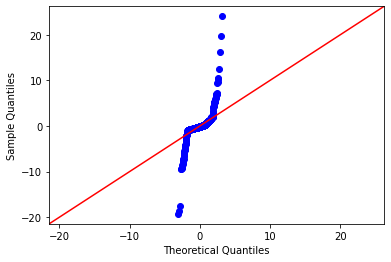

In [12]:
# analyzing the normality of the errors
sm.qqplot(data=pooled_olsr_model_results.resid, line='45')
plt.show()

Are data are in need of heavy transformation, the assumption of normality of the residuals in this context does not hold. However, our Jarque_bera test in the model output says different with a p value of < 0.001 suggesting to us our model does follow the assumption of normality. 

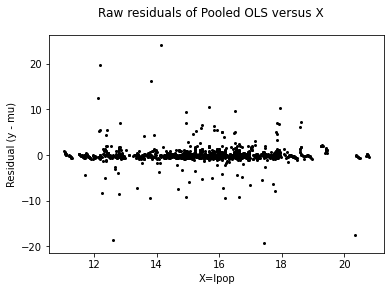

In [13]:
# analyzing heteroskeasticity 
fig, ax = plt.subplots()
fig.suptitle('Raw residuals of Pooled OLS versus X')
plt.ylabel('Residual (y - mu)')
plt.xlabel('X='+str(X_var_names[0]))
ax.scatter(pooled_X.iloc[1:][X_var_names[0]], pooled_olsr_model_results.resid, s=4, c='black', label='Residual Error')
plt.show()

There appears to be a decent amount of heteroskedasticity in the model for x = lpop on our dependent variable pcgnp. However, the heteroskedasticity is minimal and is not a concer.

In [14]:
# The heteroskedasticity can be confirmed running the White test in which we will regress the square of the 
#residual on X and test the significance of resulting regression model’s coefficients as follows:

keys = ['Lagrange Multiplier statistic:', 'LM test\'s p-value:',
        'F-statistic:', 'F-test\'s ' 'p-value:']

results = het_white(resid=pooled_olsr_model_results.resid, exog=pooled_X.dropna())
 
print('Results of the White test for heteroskedasticity of residual errors ===> ')
 
print(lzip(keys,results))

Results of the White test for heteroskedasticity of residual errors ===> 
[('Lagrange Multiplier statistic:', 200.9289678641862), ("LM test's p-value:", 8.807869588799405e-36), ('F-statistic:', 18.282872152555292), ("F-test's p-value:", 2.7512461484430875e-39)]


The LM test’s p-value is < .001 indicating a rejection of the Null hypothesis of the White test that the residuals are homoskedastic

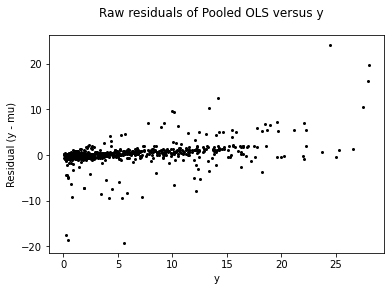

In [15]:
# Are the residual errors correlated w/ response variables Y?
fig, ax = plt.subplots()
fig.suptitle('Raw residuals of Pooled OLS versus y')
plt.ylabel('Residual (y - mu)')
plt.xlabel('y')
ax.scatter(pooled_y.iloc[1:], pooled_olsr_model_results.resid, s=4, c='black', label='Residual Error')
plt.show()

### **d. Analyzing autocorrelation**

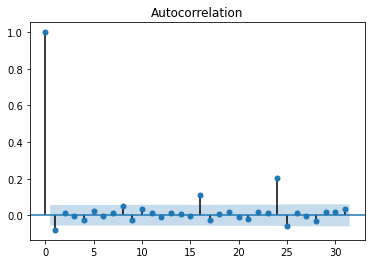

In [16]:
tsap.plot_acf(x=pooled_olsr_model_results.resid)
plt.show()

We have succesffully controlled for autocorrelation through the inclusion of a lagged DV 

# **2. Estimating Random intercepts (random effects model)** accounting for panel data structure of the dataset

### **a. Building the model**

In [17]:
# Import and preprocess data
import pandas as pd
!pip install linearmodels

dtafile = '/content/drive/MyDrive/Delaware/ICPSR_2022/Panel Data And Longitudinal Analysis/Assignments/Assignment 2_Topics 3 & 4/Copy of Poe and Tate APSR 1994.dta'


dataset = pd.read_stata(dtafile)

# adding in a lagged DV and a new variable for year (as a time counter)
dataset['lag_pcgnp'] = dataset['pcgnp'].shift(1)


dataset = dataset.set_index(['ccode', 'year'])
dataset


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 4.2 MB/s 
     |████████████████████████████████| 68 kB 4.9 MB/s 
     |████████████████████████████████| 9.8 MB 34.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


vanhdemo      pcgnp  left  ainew  sdnew  milctr2  britinfl  \
ccode year                                                                
2     1980  18.700001  11.347000     0      1      1        0         1   
      1981  18.700001  12.253999     0      1      1        0         1   
      1982  18.700001  13.160000     0      1      1        0         1   
      1983  18.700001  14.172000     0      1      1        0         1   
      1984  16.100000  15.541000     0      1      1        0         1   
...               ...        ...   ...    ...    ...      ...       ...   
990   1983        NaN   0.560000     0      1      1        0         1   
      1984        NaN   0.680000     0      1      1        0         1   
      1985        NaN   0.620000     0      1      1        0         1   
      1986        NaN   0.560000     0      1      1        0         1   
      1987        NaN   0.560000     0      1      1        0         1   

                 lpop  iwar  cwar    popinc     pcginc  polrtnew  lag_ainew  \
ccode year                                                                    
2     1980  19.243561     0     0  1.008137   7.513738         7        NaN   
      1981  19.254190     0     0  1.008137   7.993301         7        1.0   
      1982  19.264490     0     0  1.008137   7.393504         7        1.0   
      1983  19.274239     0     0  1.008137   7.689969         7        1.0   
      1984  19.283649     0     0  1.008137   9.659893         7        1.0   
...               ...   ...   ...       ...        ...       ...        ...   
990   1983  11.982929     0     0  1.045530   0.000000         4        1.0   
      1984  11.989160     0     0  1.045530  21.428570         4        1.0   
      1985  12.001510     0     0  1.045530  -8.823528         4        1.0   
      1986  12.013699     0     0  1.045530  -9.677419         4        1.0   
      1987  12.021809     0     0  1.045530   0.000000         4        1.0   

            lag_sdnew  lag_pcgnp  
ccode year                        
2     1980        NaN        NaN  
      1981        1.0  11.347000  
      1982        1.0  12.253999  
      1983        1.0  13.160000  
      1984        1.0  14.172000  
...               ...        ...  
990   1983        1.0   0.560000  
      1984        1.0   0.560000  
      1985        1.0   0.680000  
      1986        1.0   0.620000  
      1987        1.0   0.560000  

[1224 rows x 16 columns]

In [18]:
years = dataset.index.get_level_values('year').to_list()
dataset['year'] = pd.Categorical(years)


dataset




vanhdemo      pcgnp  left  ainew  sdnew  milctr2  britinfl  \
ccode year                                                                
2     1980  18.700001  11.347000     0      1      1        0         1   
      1981  18.700001  12.253999     0      1      1        0         1   
      1982  18.700001  13.160000     0      1      1        0         1   
      1983  18.700001  14.172000     0      1      1        0         1   
      1984  16.100000  15.541000     0      1      1        0         1   
...               ...        ...   ...    ...    ...      ...       ...   
990   1983        NaN   0.560000     0      1      1        0         1   
      1984        NaN   0.680000     0      1      1        0         1   
      1985        NaN   0.620000     0      1      1        0         1   
      1986        NaN   0.560000     0      1      1        0         1   
      1987        NaN   0.560000     0      1      1        0         1   

                 lpop  iwar  cwar    popinc     pcginc  polrtnew  lag_ainew  \
ccode year                                                                    
2     1980  19.243561     0     0  1.008137   7.513738         7        NaN   
      1981  19.254190     0     0  1.008137   7.993301         7        1.0   
      1982  19.264490     0     0  1.008137   7.393504         7        1.0   
      1983  19.274239     0     0  1.008137   7.689969         7        1.0   
      1984  19.283649     0     0  1.008137   9.659893         7        1.0   
...               ...   ...   ...       ...        ...       ...        ...   
990   1983  11.982929     0     0  1.045530   0.000000         4        1.0   
      1984  11.989160     0     0  1.045530  21.428570         4        1.0   
      1985  12.001510     0     0  1.045530  -8.823528         4        1.0   
      1986  12.013699     0     0  1.045530  -9.677419         4        1.0   
      1987  12.021809     0     0  1.045530   0.000000         4        1.0   

            lag_sdnew  lag_pcgnp  year  
ccode year                              
2     1980        NaN        NaN  1980  
      1981        1.0  11.347000  1981  
      1982        1.0  12.253999  1982  
      1983        1.0  13.160000  1983  
      1984        1.0  14.172000  1984  
...               ...        ...   ...  
990   1983        1.0   0.560000  1983  
      1984        1.0   0.560000  1984  
      1985        1.0   0.680000  1985  
      1986        1.0   0.620000  1986  
      1987        1.0   0.560000  1987  

[1224 rows x 17 columns]

In [19]:
# Perform PooledOLS
from linearmodels import RandomEffects
import statsmodels.api as sm

exog = dataset[['lpop', 'year', 'left']]
exog = sm.tools.tools.add_constant(exog)
endog = dataset['pcgnp']
mod = RandomEffects(endog, exog)
RandomEffects_res = mod.fit(cov_type='clustered')

#Store values for checking homoskedasticity graphically
fittedvals_RandomEffects = RandomEffects_res.predict().fitted_values
residuals_RandomEffects = RandomEffects_res.resids

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [20]:
print(RandomEffects_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:                  pcgnp   R-squared:                        0.0459
Estimator:              RandomEffects   R-squared (Between):             -0.0786
No. Observations:                1224   R-squared (Within):               0.0596
Date:                Fri, Jul 29 2022   R-squared (Overall):             -0.0715
Time:                        02:43:43   Log-likelihood                   -1915.2
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      6.4935
Entities:                         153   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                  F(9,1214)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             2.5514
                            

In [21]:
Plotting_random_effects = RandomEffects_res.estimated_effects[::8].reset_index()
Plotting_random_effects

,ccode,year,estimated_effects
0,2,1980,13.131975
1,20,1980,9.425059
2,31,1980,1.489099
3,40,1980,-0.808365
4,41,1980,-3.021016
...,...,...,...
148,911,1980,-5.075466
149,914,1980,-5.420906
150,920,1980,3.671709
151,950,1980,-3.196863


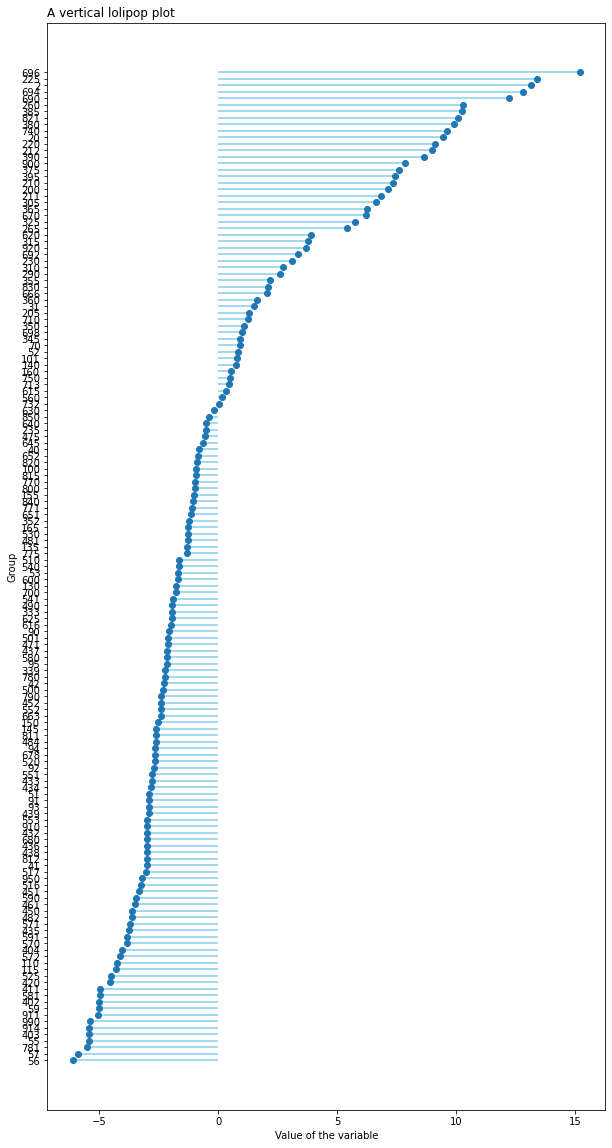

In [22]:
# Reorder it based on the values

fig, ax = plt.subplots(figsize=(10, 20))

ordered_df = Plotting_random_effects.sort_values(by='estimated_effects')
my_range=range(1,len(Plotting_random_effects.index)+1)
 
# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['estimated_effects'], color='skyblue')
plt.plot(ordered_df['estimated_effects'], my_range, "o")
 
# Add titles and axis names
plt.yticks(my_range, ordered_df['ccode'])
plt.title("A vertical lolipop plot", loc='left')
plt.xlabel('Value of the variable')
plt.ylabel('Group')

# Show the plot
plt.show()

### **Solution**
Overall, I do find a difference between the two models. For the pooled OLS model, the R squared is completely non-sensical. Meanwhile, the R squaread for the Pooled OLS model accounts for nearly 82% of the variation in the Dependent Variable. However, the Pooled OLS is not accounting for heterogeniety between our groups (countries) in this case to the extent the random effects is. Moreover, the random effects can be said to be a greater approximation of "reality" as it pulls from an underlying distribution and estimates both within and between effects. Meanwhile, our pooled OLS model is only estimating overall effects and not taking into account any grouping structure of our data. 

### **b. Question 2B Bonus**
If you’re using Stata, retreive theta using the , theta option. What’s this telling you about the proportion
of quasi-demeaning?)

In [23]:
RandomEffects_res.theta

,theta
ccode,
2,0.922647
20,0.922647
31,0.922647
40,0.922647
41,0.922647
...,...
911,0.922647
914,0.922647
920,0.922647


### **Solution**

Overall, theta is close to 1 -- this tells us that our random effects model has estimated the covariates utilizing much more of the within variation relative to the between variation. This is also evident in examining the R^2 for within and between variation where the within variaiton is pulling a lot more weight and is actually sensical relative to the between variation which is negative and does not make sense statistically.**

# **Question 3**
Estimate a fixed intercepts model and interpret these results. Do your results change from Q2? Be sure to
note if your model dropped/couldn’t estimate something

In [34]:
# making years categorical
years = dataset.index.get_level_values('year').to_list()
dataset['year'] = pd.Categorical(years)



# Perform PooledOLS
from linearmodels import PanelOLS
import statsmodels.api as sm

exog = dataset[['lpop', 'year', 'left']]
exog = sm.tools.tools.add_constant(exog)
endog = dataset['pcgnp']
mod = PanelOLS(endog, exog)
pooledOLS_res = mod.fit(cov_type='clustered', cluster_entity=True, cluster_time=True)

#Store values for checking homoskedasticity graphically
fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [35]:
print(pooledOLS_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                  pcgnp   R-squared:                        0.0228
Estimator:                   PanelOLS   R-squared (Between):              0.0221
No. Observations:                1224   R-squared (Within):               0.0350
Date:                Fri, Jul 29 2022   R-squared (Overall):              0.0228
Time:                        03:01:42   Log-likelihood                   -3679.5
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      3.1406
Entities:                         153   P-value                           0.0009
Avg Obs:                       8.0000   Distribution:                  F(9,1214)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             0.7873
                            

/usr/local/lib/python3.7/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


In [38]:
# 3.B Non-Autocorrelation
# Durbin-Watson-Test
from statsmodels.stats.stattools import durbin_watson

durbin_watson_test_results = durbin_watson(pooled_OLS_dataset['residual']) 
print(durbin_watson_test_results)

0.18301587642183037


DW test is telling us we still have strong positive autocorrelation in the model that is not necessarily being accounted for. 

### **Solution** 
Overall, our fixed effects model is not telling us anything new. In fact, it has explained less of the variation in the DV than the random effects has. Mostl likely because the fixed effects model only really estimates the parameter estimates using within variation so it is working with less data to fit the predictors. All else aside, nothing much has changed between both models other than the fact that the variable "left" is statistically significant in the fixed effects model while in the random effects model it is not; and vice versa for the "lpop" variable. 

# **Question 4**
Run a Hausman test to discern between RE and FE, OR state why you cannot run a Hausman/believe the
results.

I could not run a hasuman test in R, all of the packages to do so recognized the test as being useful for 2SLS. Therefore, I conclude here that the hausman test is not a good predictor for if we should use fixed and or random effects. 

In [51]:
# Print as latex
print(pooledOLS_res.summary.as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &       pcgnp        & \textbf{  R-squared:         }   &      0.0228      \\
\textbf{Estimator:}        &      PanelOLS      & \textbf{  R-squared (Between):}  &      0.0221      \\
\textbf{No. Observations:} &        1224        & \textbf{  R-squared (Within):}   &      0.0350      \\
\textbf{Date:}             &  Fri, Jul 29 2022  & \textbf{  R-squared (Overall):}  &      0.0228      \\
\textbf{Time:}             &      03:01:42      & \textbf{  Log-likelihood     }   &     -3679.5      \\
\textbf{Cov. Estimator:}   &     Clustered      & \textbf{                     }   &                  \\
\textbf{}                  &                    & \textbf{  F-statistic:       }   &      3.1406      \\
\textbf{Entities:}         &        153         & \textbf{  P-value            }   &      0.0009      \\
\textbf{Avg Obs:}          &       8.0000       & \textbf{  Distribution:      }   &    F(9,1214)     \\
\textbf{M

/usr/local/lib/python3.7/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")
